# Analysis of Energy Trading as well as Dynamic Pricing Amongst Microgrids 


### Importing the Libraries

In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib notebook

### Configuration of Smart Grids
- Agent 1 : [2.667e-07, 0.541, 6.5965, 4.3712]
- Agent 2 : [8.8281, 10.2997, 9.8301, 9.7514]
- Agent 3 : [8.8281, 10.2997, 9.8301, 9.7514]


# Preprocessing

### Entering the Paths of the Files

In [2]:
adl_log_path = './logs/adl_logger.txt'
battery_log_path = './logs/battery_logger.txt'
logger_updates_path = './logs/logger_updates.txt'
nd_log_path = './logs/nd_logger.txt'
prices_log_path = './logs/price_logger.txt'
transmission_log_path = './logs/transmission_logger.txt'

### Creating the Necessary Variables

In [3]:
# Agent Configurations
num_of_agents = 3
num_of_time_steps = 4

# Agent Lists
adl = []
battery = []
average_rewards = []
nd = []
prices = []
rewards = []
transmission = []
average_rewards_random = []

for i in range(num_of_agents):
    adl.append([])
    battery.append([])
    average_rewards.append([])
    nd.append([])
    prices.append([])
    rewards.append([])
    transmission.append([])
    average_rewards_random.append([])
    
for i in range(num_of_agents):
    for j in range(num_of_time_steps):
        adl[i].append([])
        battery[i].append([])
        nd[i].append([])
        prices[i].append([])
        rewards[i].append([])
        transmission[i].append([])

###  ADL Scheduling

In [4]:
j=0
with open(adl_log_path,'r') as re:
    for line in re:
        list_ = line.strip().split()
        for i in range(num_of_agents):
            if j == num_of_time_steps:
                j = 0
            adl[i][j].append(float(list_[i]))
        j +=1

### Battery

In [5]:
j=0
with open(battery_log_path,'r') as re:
    for line in re:
        list_ = line.strip().split()
        for i in range(num_of_agents):
            if j == num_of_time_steps:
                j = 0
            battery[i][j].append(float(list_[i]))
        j +=1

### ND

In [6]:
j=0
with open(nd_log_path,'r') as re:
    for line in re:
        list_ = line.strip().split()
        for i in range(num_of_agents):
            if j == num_of_time_steps:
                j = 0
            nd[i][j].append(float(list_[i]))
        j +=1

### Prices

In [7]:
j=0
with open(prices_log_path,'r') as re:
    for line in re:
        list_ = line.strip().split()
        for i in range(num_of_agents):
            if j == num_of_time_steps:
                j = 0
            prices[i][j].append(float(list_[i]))
        j +=1

### Transmission Log

In [8]:
j=0
with open(transmission_log_path,'r') as re:
    for line in re:
        list_ = line.strip().split()
        for i in range(num_of_agents):
            if j == num_of_time_steps:
                j = 0
            transmission[i][j].append(float(list_[i]))
        j +=1

### Average Rewards

In [9]:
string = 'reward'
j = 0
with open(logger_updates_path,'r') as re:
    for line in re:
        if j == num_of_agents:
            j = 0
        if string in line:
            list_ = line.strip().split()
            average_rewards[j].append(float(list_[(len(list_)) - 1]))
            j+=1

### Random Agents

In [10]:
logger_updates_path_random = './logs-random/logger_updates.txt'

In [11]:
string = 'reward'
j = 0
with open(logger_updates_path_random,'r') as re:
    for line in re:
        if j == num_of_agents:
            j = 0
        if string in line:
            list_ = line.strip().split()
            average_rewards_random[j].append(float(list_[(len(list_)) - 1]))
            j+=1

# Graphs

### Convergence of all the three agents

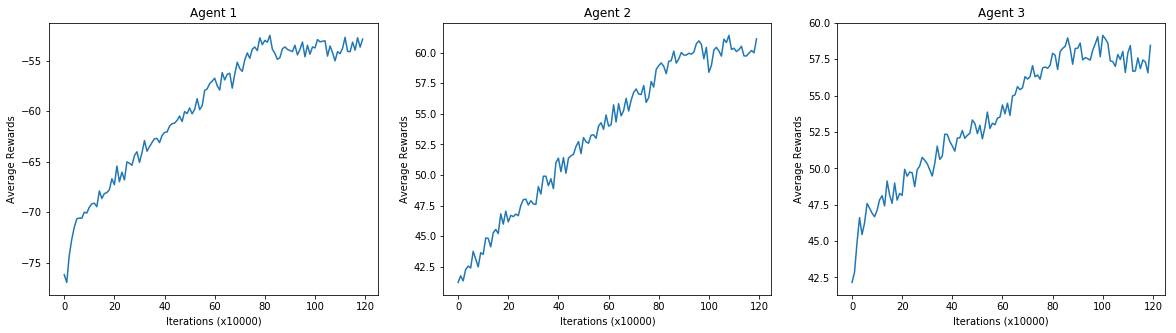

In [12]:
#Plotting 
plt.rcParams["figure.figsize"] = (20,5)

for i in range(num_of_agents):   
    plt.subplot(1, 3, i +1)
    plt.plot(average_rewards[i])
    plt.title('Agent ' + str(i+1))
    plt.xlabel('Iterations (x10000)')
    plt.ylabel('Average Rewards')

plt.show()

### Pricing Correctness

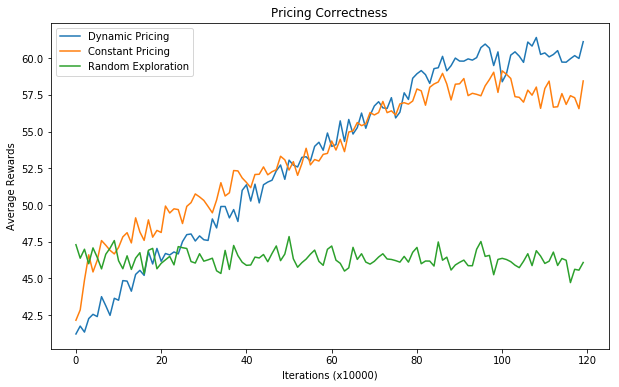

In [13]:
#Plotting 
plt.rcParams["figure.figsize"] = (10,6)
plt.plot(average_rewards[1], label = 'Dynamic Pricing')
plt.plot(average_rewards[2], label = 'Constant Pricing')
plt.plot(average_rewards_random[2], label = 'Random Exploration')
plt.title('Pricing Correctness')
plt.ylabel('Average Rewards')
plt.xlabel('Iterations (x10000)')
plt.legend()
plt.show()


### ADL Scheduling 

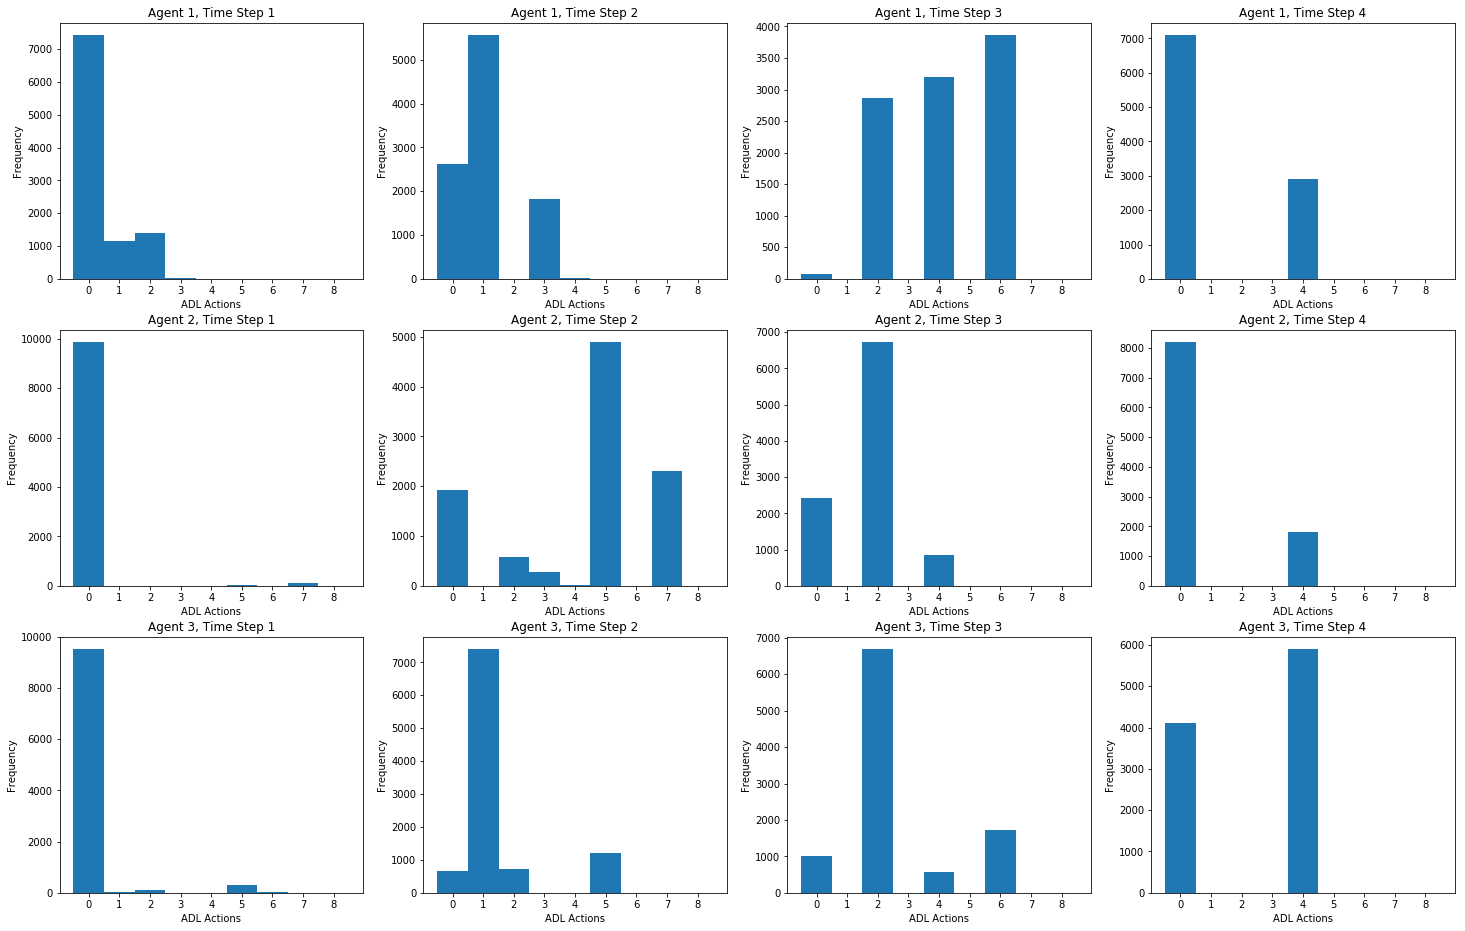

In [14]:
plt.rcParams["figure.figsize"] = (25,16)
graph_number = 1
for i in range(num_of_agents):
    for j in range(num_of_time_steps):
            plt.subplot(num_of_agents, num_of_time_steps, graph_number)
            plt.hist(sorted(adl[i][j][-10000:]), bins = [-0.5, 0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5])
            plt.title('Agent ' + str(i+1) + ', Time Step ' + str(j+1))
            plt.xlabel('ADL Actions')
            plt.ylabel('Frequency')
            plt.xticks(range(0, 9))
            graph_number +=1
plt.show()


### Dynamic Pricing

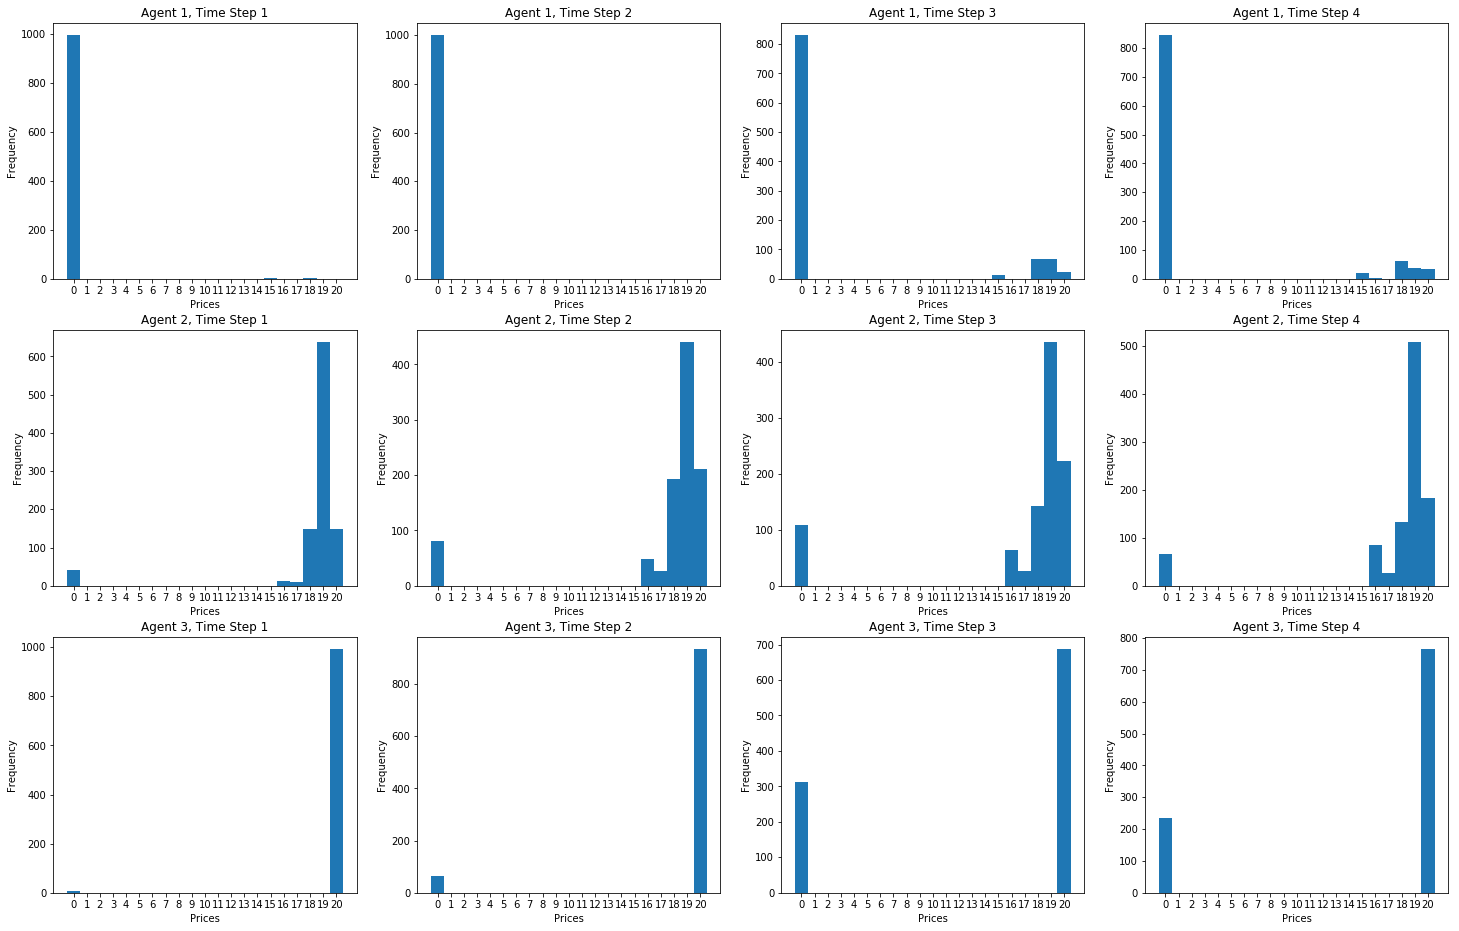

In [15]:
plt.rcParams["figure.figsize"] = (25,16)
graph_number = 1
for i in range(num_of_agents):
    for j in range(num_of_time_steps):
            plt.subplot(num_of_agents, num_of_time_steps, graph_number)
            plt.hist(sorted(prices[i][j][-1000:]), bins = [-0.5, 0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5, 10.5, 11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5])
            plt.title('Agent ' + str(i+1) + ', Time Step ' + str(j+1))
            plt.xlabel('Prices')
            plt.ylabel('Frequency')
            plt.xticks(range(0, 21))
            graph_number +=1

plt.show()

## Price Scheduling

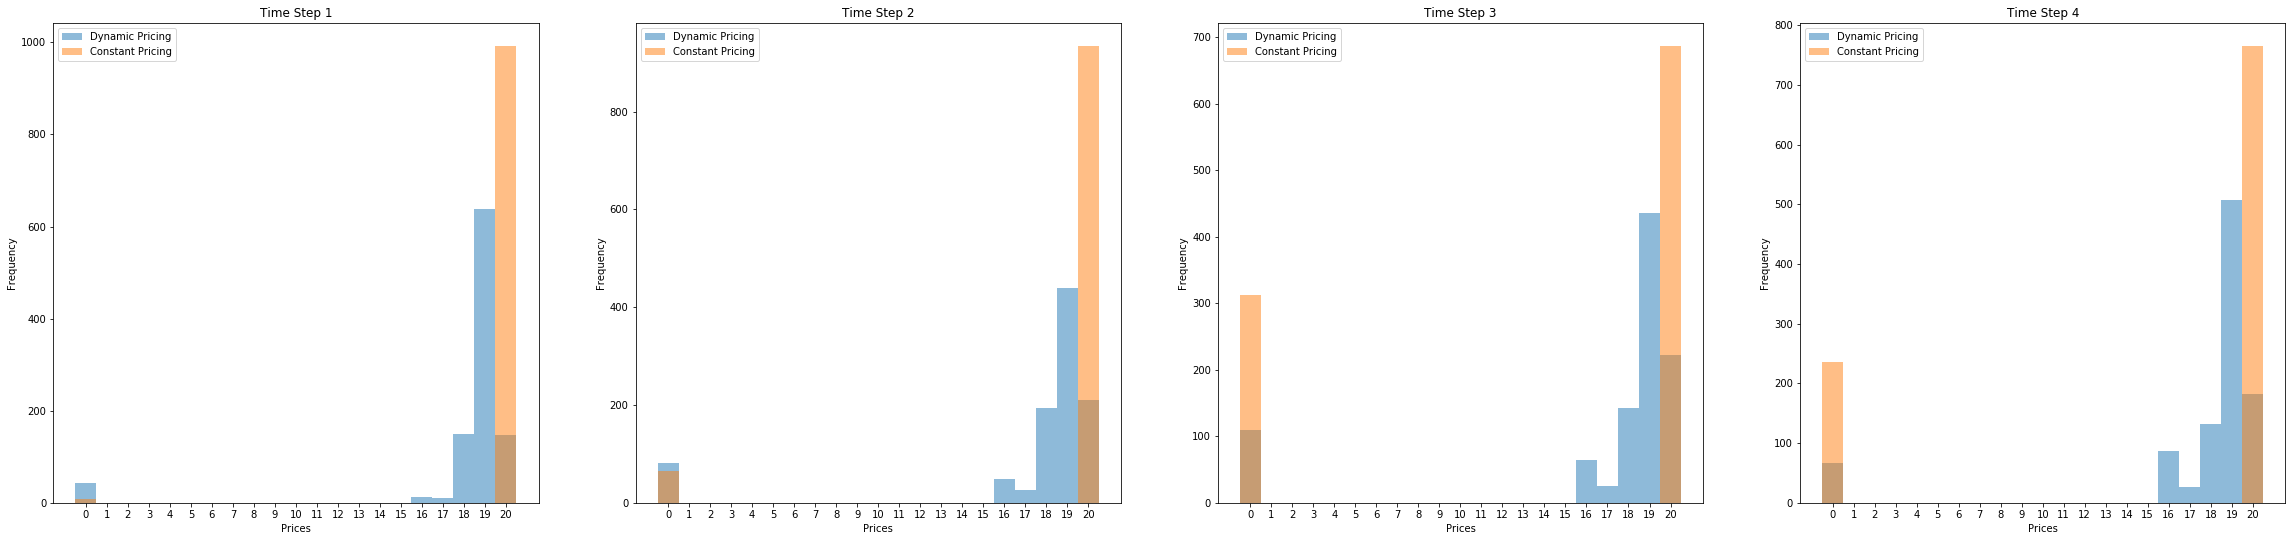

In [16]:
plt.rcParams["figure.figsize"] = (40, 30)
graph_number = 1
for j in range(num_of_time_steps):
        plt.subplot(num_of_agents, num_of_time_steps, graph_number)
        plt.hist(sorted(prices[1][j][-1000:]), bins = [-0.5, 0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5, 10.5, 11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5],  alpha = 0.5, label = 'Dynamic Pricing')
        plt.hist(sorted(prices[2][j][-1000:]), bins = [-0.5, 0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5, 10.5, 11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5], alpha = 0.5, label = 'Constant Pricing')
        plt.title('Time Step ' + str(j+1))
        plt.xlabel('Prices')
        plt.ylabel('Frequency')
        plt.xticks(range(0, 21))
        plt.legend()
        graph_number +=1

plt.show()
